In [1]:
import pandas as pd
import glob
import os
import datetime
import pprint
pp = pprint.PrettyPrinter(indent=4)


In [2]:
sensorFolder = 'spl-deploy-rc3flr'

## Data Pre-Processing

In [3]:
#checking files in folder -- this notebook is in the same directory

"""
optional

"""
files = os.listdir('./'+sensorFolder)
pp.pprint(files)

[   '2022-06-09.csv',
    '2022-06-08.csv',
    '.DS_Store',
    '2022-05-29.csv',
    '2022-05-28.csv',
    '2022-05-26.csv',
    '2022-05-27.csv',
    '2022-05-25.csv',
    '2022-05-31.csv',
    '2022-05-19.csv',
    '2022-05-18.csv',
    '2022-05-30.csv',
    '2022-05-24.csv',
    '2022-05-20.csv',
    '2022-05-21.csv',
    '2022-05-23.csv',
    '2022-05-22.csv',
    '.ipynb_checkpoints',
    '2022-06-01.csv',
    '2022-06-03.csv',
    '2022-06-02.csv',
    '2022-06-12.csv',
    '2022-06-06.csv',
    '2022-06-07.csv',
    '2022-06-13.csv',
    '2022-06-05.csv',
    '2022-06-11.csv',
    '2022-06-10.csv',
    '2022-06-04.csv']


In [4]:
#selecting all the csv files
files = os.path.join(sensorFolder,"2022*.csv")

# list of merged files returned
files = glob.glob(files)

#sorting files by date
files.sort()
pp.pprint(files)

#checking a single file
print(files[0])

[   'spl-deploy-rc3flr/2022-05-18.csv',
    'spl-deploy-rc3flr/2022-05-19.csv',
    'spl-deploy-rc3flr/2022-05-20.csv',
    'spl-deploy-rc3flr/2022-05-21.csv',
    'spl-deploy-rc3flr/2022-05-22.csv',
    'spl-deploy-rc3flr/2022-05-23.csv',
    'spl-deploy-rc3flr/2022-05-24.csv',
    'spl-deploy-rc3flr/2022-05-25.csv',
    'spl-deploy-rc3flr/2022-05-26.csv',
    'spl-deploy-rc3flr/2022-05-27.csv',
    'spl-deploy-rc3flr/2022-05-28.csv',
    'spl-deploy-rc3flr/2022-05-29.csv',
    'spl-deploy-rc3flr/2022-05-30.csv',
    'spl-deploy-rc3flr/2022-05-31.csv',
    'spl-deploy-rc3flr/2022-06-01.csv',
    'spl-deploy-rc3flr/2022-06-02.csv',
    'spl-deploy-rc3flr/2022-06-03.csv',
    'spl-deploy-rc3flr/2022-06-04.csv',
    'spl-deploy-rc3flr/2022-06-05.csv',
    'spl-deploy-rc3flr/2022-06-06.csv',
    'spl-deploy-rc3flr/2022-06-07.csv',
    'spl-deploy-rc3flr/2022-06-08.csv',
    'spl-deploy-rc3flr/2022-06-09.csv',
    'spl-deploy-rc3flr/2022-06-10.csv',
    'spl-deploy-rc3flr/2022-06-11.csv',


In [ ]:
#getting total length of rows merged csv SHOULD be
"""
optional

"""
c = 0
for f in files:
    print(f)
    results = pd.read_csv(f)
    c+= len(results)
print(c)

In [5]:
print("Resultant CSV after joining all CSV files at a particular location...");
# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
         Unnamed: 0   laeq   lceq   lzeq          time
0                 0  64.35  72.85  73.29  1.652933e+09
1                 1  64.44  73.43  73.85  1.652933e+09
2                 2  64.08  72.59  73.08  1.652933e+09
3                 3  64.06  71.71  72.36  1.652933e+09
4                 4  63.41  71.62  72.22  1.652933e+09
...             ...    ...    ...    ...           ...
1930958         115  61.96  72.26  73.65  1.655093e+09
1930959         116  61.29  73.09  74.81  1.655093e+09
1930960         117  58.99  73.20  74.77  1.655093e+09
1930961         118  58.27  74.80  76.56  1.655093e+09
1930962         119  58.17  73.69  75.72  1.655093e+09

[1930963 rows x 5 columns]


In [6]:
#converting epoch time to datetime
df['time'] = df.time.apply(datetime.datetime.fromtimestamp)
# df['time'] = pd.to_datetime(df['time'], unit = 's')
df.rename(columns={'time': 'datetime'}, inplace=True)


In [7]:
#adding additional columns for datetime 

#extracting exact date
df['date'] = df['datetime'].dt.date

#extracting day of week
df['dayofweek'] = df['datetime'].dt.dayofweek
# df['dayofweek_name'] = df['datetime'].dt.day_name

#extracting extra data
# df['hour'] = df['datetime'].dt.hour
# df['min'] = df['datetime'].dt.minute
# df['sec'] = df['datetime'].dt.second

In [19]:
#checking file
print(df)


         Unnamed: 0   laeq   lceq   lzeq                datetime        date  \
0                 0  64.35  72.85  73.29 2022-05-18 23:59:16.155  2022-05-18   
1                 1  64.44  73.43  73.85 2022-05-18 23:59:16.898  2022-05-18   
2                 2  64.08  72.59  73.08 2022-05-18 23:59:18.392  2022-05-18   
3                 3  64.06  71.71  72.36 2022-05-18 23:59:19.126  2022-05-18   
4                 4  63.41  71.62  72.22 2022-05-18 23:59:19.871  2022-05-18   
...             ...    ...    ...    ...                     ...         ...   
1930958         115  61.96  72.26  73.65 2022-06-13 00:01:54.668  2022-06-13   
1930959         116  61.29  73.09  74.81 2022-06-13 00:01:56.150  2022-06-13   
1930960         117  58.99  73.20  74.77 2022-06-13 00:01:56.893  2022-06-13   
1930961         118  58.27  74.80  76.56 2022-06-13 00:01:57.638  2022-06-13   
1930962         119  58.17  73.69  75.72 2022-06-13 00:01:59.125  2022-06-13   

         dayofweek  
0                2

In [ ]:
#saving df to csv
#df.to_csv('masterdata.csv') uncomment to save file locally

## Analyzing Data

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [113]:
def getBasicStat(groupbyThisName):
    result = df.groupby(groupbyThisName).agg({'laeq': ['mean', 'min', 'max', 'std', 'median']})
    ambientEQ = df.groupby(groupbyThisName).quantile(0.1)
    
    ambientEQ= ambientEQ['laeq']
    days = result.index
    means = result['laeq', 'mean']
    mins = result['laeq', 'min']
    maxs = result['laeq', 'max']
    stds = result['laeq', 'std']
    medians = result['laeq', 'median']
    
    
#     return result
    return days, means, mins, maxs, stds, medians, ambientEQ;

In [112]:
z = df.groupby(pd.Grouper(key='datetime', freq='1min')).agg({'laeq': ['mean', 'min', 'max']})
ptile = df.groupby(pd.Grouper(key='datetime', freq='1min')).quantile(.10)

# y = df.groupby(['datetime', '']).agg({'laeq': ['mean']})

# print(x)
# print(z)
print(ptile)
print(ptile['laeq'])

# print(x.index.date)
# y = x.groupby(x.index.date)
# print(y)

# print(np.percentile(df['laeq'], 90))

                     Unnamed: 0    laeq    lceq    lzeq  dayofweek
datetime                                                          
2022-05-18 15:32:00         4.3  60.509  67.466  68.195        2.0
2022-05-18 15:33:00         5.9  65.198  74.150  74.548        2.0
2022-05-18 15:34:00         5.9  65.099  73.522  74.010        2.0
2022-05-18 15:35:00         5.9  64.989  73.742  74.195        2.0
2022-05-18 15:36:00         5.9  64.923  74.226  74.750        2.0
...                         ...     ...     ...     ...        ...
2022-06-13 18:57:00         5.9  62.499  74.743  75.947        0.0
2022-06-13 18:58:00         6.8  62.590  74.434  75.756        0.0
2022-06-13 18:59:00         5.0  62.430  74.420  75.690        0.0
2022-06-13 19:00:00         5.9  62.648  74.506  75.614        0.0
2022-06-13 19:01:00         6.8  62.738  75.004  76.308        0.0

[37650 rows x 5 columns]
datetime
2022-05-18 15:32:00    60.509
2022-05-18 15:33:00    65.198
2022-05-18 15:34:00    65.099
2022

In [91]:
# z.plot()

#### Time-Series: All Data 

In [131]:
DTdays, DTmeans, DTmins, DTmaxs, DTstds, DTmedians, DTambient = getBasicStat(pd.Grouper(key='datetime', freq='30min'))
# DTdays, DTmeans, DTmins, DTmaxs, DTstds, DTmedians = getBasicStat('date')
# DTdays = DTdays.date

In [132]:
# print(np.unique(DTdays.date))

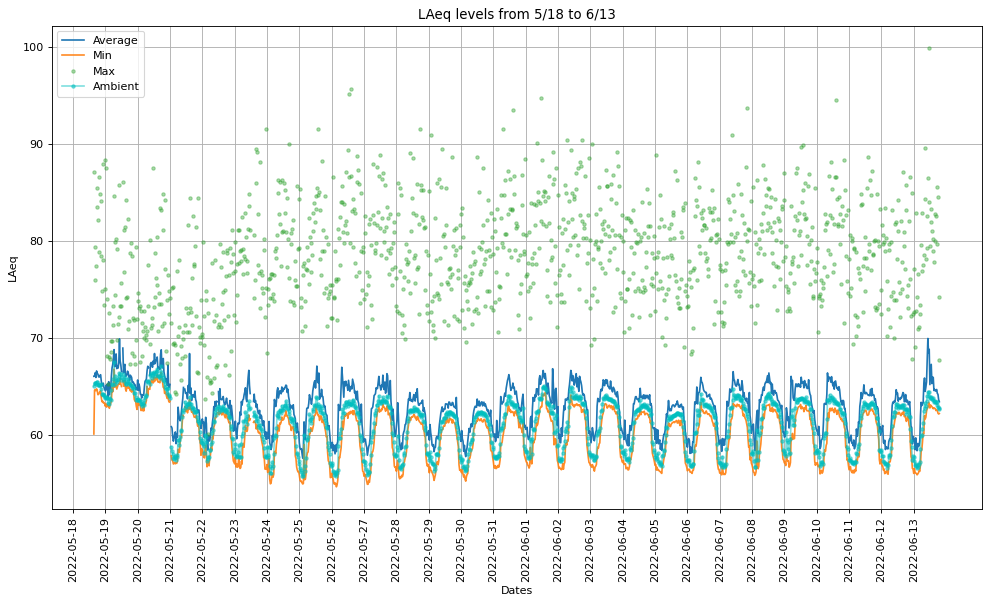

In [136]:
figure(figsize=(15, 8), dpi=80)
plt.plot(DTdays, DTmeans)
plt.plot(DTdays, DTmins, alpha = 0.9)
plt.plot(DTdays, DTmaxs, '.', alpha = .4)

plt.plot(DTdays, DTambient,'.-', c='c', alpha=0.5)

# plt.plot(DTdays, DTmedians)
plt.xticks(np.unique(DTdays.date))  # Set text labels.
plt.xlabel('Dates')
plt.ylabel('LAeq')
plt.xticks(rotation = 90)
plt.title('LAeq levels from 5/18 to 6/13')
# plt.errorbar(DTdays, DTmeans, yerr = DTstds, c = 'c')
plt.legend(['Average','Min', 'Max', 'Ambient'])
# plt.legend(['Average','Min', 'Max', 'Median'])
plt.grid(True)
plt.show()

#### Time Series: Day of Week

In [489]:
DateDW = df.groupby(pd.Grouper(key='datetime', freq='30min')).agg({'laeq': ['mean', 'min', 'max']})
DateDWambient= df.groupby(pd.Grouper(key='datetime', freq='30min')).quantile(0.1)
DateDW['ambient'] = DateDWambient['laeq']

DateDW['dayofweek'] = DateDW.index.dayofweek
# test = df.groupby(pd.Grouper(key='datetime', freq='1min')).agg({'laeq': ['mean', 'min', 'max']})
print(DateDW)
# print(test.index.dayofweek)

                          laeq               ambient dayofweek
                          mean    min    max                  
datetime                                                      
2022-05-18 15:30:00  66.081280  60.14  87.18  65.060         2
2022-05-18 16:00:00  66.085828  64.67  76.03  65.370         2
2022-05-18 16:30:00  66.445950  64.71  79.45  65.440         2
2022-05-18 17:00:00  65.962994  64.60  77.46  65.260         2
2022-05-18 17:30:00  66.636889  64.79  85.48  65.500         2
...                        ...    ...    ...     ...       ...
2022-06-13 17:00:00  64.728066  62.62  79.67  63.420         0
2022-06-13 17:30:00  64.330544  62.57  85.57  63.150         0
2022-06-13 18:00:00  64.221661  62.28  84.56  62.940         0
2022-06-13 18:30:00  63.666956  62.20  74.28  62.810         0
2022-06-13 19:00:00  63.471345  62.25  67.81  62.698         0

[1256 rows x 5 columns]


In [516]:
print(DateDW.iloc[2]) 
      #== datetime.time(15, 30))
print(DateDW.index.time)


laeq       mean    66.44595
           min     64.71000
           max     79.45000
ambient            65.44000
dayofweek           2.00000
Name: 2022-05-18 16:30:00, dtype: float64
[datetime.time(15, 30) datetime.time(16, 0) datetime.time(16, 30) ...
 datetime.time(18, 0) datetime.time(18, 30) datetime.time(19, 0)]


In [570]:
# print(DateDW.items)
testing1 = DateDW.index
print(testing1[0])
testing1[0].time() == datetime.time(15, 30)
# for time in DateDW.index.date 



2022-05-18 15:30:00


True

In [573]:
def groupWeek(data, showData = False):
    weeks = {}
    wk = pd.DataFrame(columns = data.columns)
    dates = data.index
    c = 0
#     print(type(wk), type(data))

    for d in dates:
        if (d.dayofweek == 6 and d.time() == datetime.time(23,30)):
            c+=1

#             wk.loc[data.index[c]]=data.loc[data.index[c]]
            wk.loc[d]=data.loc[d]
#             print(f'week is {wk}')
            weeks[c] = wk
#             weeks.append(wk)
#             print(f'-----------WEEKS IS NOW {weeks}')
#             print(c)
#             print(weeks['c'])
            wk = pd.DataFrame(columns = data.columns)
#             print(wk)
        else:
#             wk.append(data.loc[d])
#             print(type(wk), wk)
            wk.loc[d]=data.loc[d]
#         print(d.dayofweek)
    if showData == True:
        for key in weeks:
            print("\n" +"="*40)
            print(key)
            print("-"*40)
            print(weeks[key])
    return weeks;

# for d in DateDW.index:
#     print(type(d))
# print(type(DateDW.index[0]))
# print()

In [574]:
groupWeek(DateDW)

{1:                           laeq               ambient dayofweek
                           mean    min    max                  
 2022-05-18 15:30:00  66.081280  60.14  87.18  65.060       2.0
 2022-05-18 16:00:00  66.085828  64.67  76.03  65.370       2.0
 2022-05-18 16:30:00  66.445950  64.71  79.45  65.440       2.0
 2022-05-18 17:00:00  65.962994  64.60  77.46  65.260       2.0
 2022-05-18 17:30:00  66.636889  64.79  85.48  65.500       2.0
 ...                        ...    ...    ...     ...       ...
 2022-05-22 21:30:00  63.090202  59.66  77.86  60.930       6.0
 2022-05-22 22:00:00  62.485377  58.73  81.16  59.775       6.0
 2022-05-22 22:30:00  61.710389  58.08  78.64  59.597       6.0
 2022-05-22 23:00:00  60.431300  57.37  76.72  58.248       6.0
 2022-05-22 23:30:00  60.597643  57.21  72.37  58.079       6.0
 
 [209 rows x 5 columns],
 2:                           laeq               ambient dayofweek
                           mean    min    max                  
 2022-0

{1:                           laeq               ambient dayofweek
                          mean    min    max                  
2022-05-18 15:30:00  66.081280  60.14  87.18  65.060       2.0
2022-05-18 16:00:00  66.085828  64.67  76.03  65.370       2.0
2022-05-18 16:30:00  66.445950  64.71  79.45  65.440       2.0
2022-05-18 17:00:00  65.962994  64.60  77.46  65.260       2.0
2022-05-18 17:30:00  66.636889  64.79  85.48  65.500       2.0
...                        ...    ...    ...     ...       ...
2022-05-22 21:30:00  63.090202  59.66  77.86  60.930       6.0
2022-05-22 22:00:00  62.485377  58.73  81.16  59.775       6.0
2022-05-22 22:30:00  61.710389  58.08  78.64  59.597       6.0
2022-05-22 23:00:00  60.431300  57.37  76.72  58.248       6.0
2022-05-22 23:30:00  60.597643  57.21  72.37  58.079       6.0

[209 rows x 5 columns], 2:                           laeq               ambient dayofweek
                          mean    min    max                  
2022-05-23 00:00:00  60

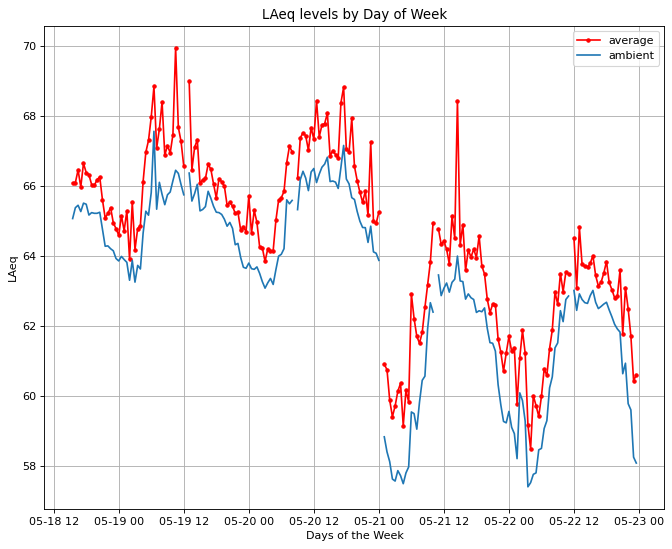

2022-05-23 00:00:00    58.619
2022-05-23 00:30:00    59.089
2022-05-23 01:00:00    57.727
2022-05-23 01:30:00    57.848
2022-05-23 02:00:00    57.879
                        ...  
2022-05-29 21:30:00    60.298
2022-05-29 22:00:00    59.730
2022-05-29 22:30:00    58.500
2022-05-29 23:00:00    57.890
2022-05-29 23:30:00    57.640
Name: ambient, Length: 336, dtype: float64


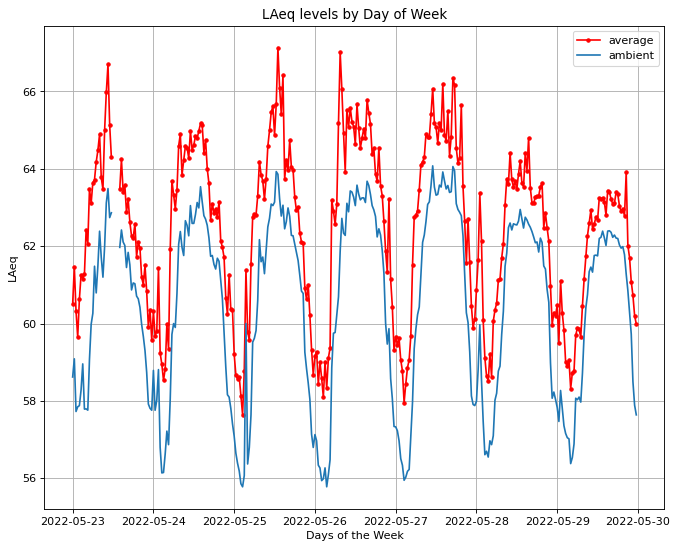

2022-05-30 00:00:00    57.24
2022-05-30 00:30:00    57.44
2022-05-30 01:00:00    57.54
2022-05-30 01:30:00    56.78
2022-05-30 02:00:00    56.61
                       ...  
2022-06-05 21:30:00    60.22
2022-06-05 22:00:00    59.42
2022-06-05 22:30:00    58.29
2022-06-05 23:00:00    57.85
2022-06-05 23:30:00    57.43
Name: ambient, Length: 336, dtype: float64


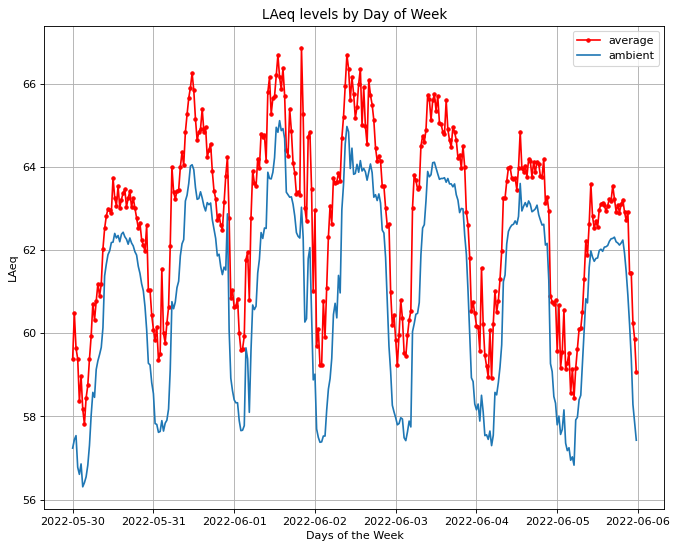

2022-06-06 00:00:00    57.318
2022-06-06 00:30:00    57.480
2022-06-06 01:00:00    57.300
2022-06-06 01:30:00    57.430
2022-06-06 02:00:00    56.980
                        ...  
2022-06-12 21:30:00    60.628
2022-06-12 22:00:00    59.370
2022-06-12 22:30:00    58.820
2022-06-12 23:00:00    57.490
2022-06-12 23:30:00    57.870
Name: ambient, Length: 336, dtype: float64


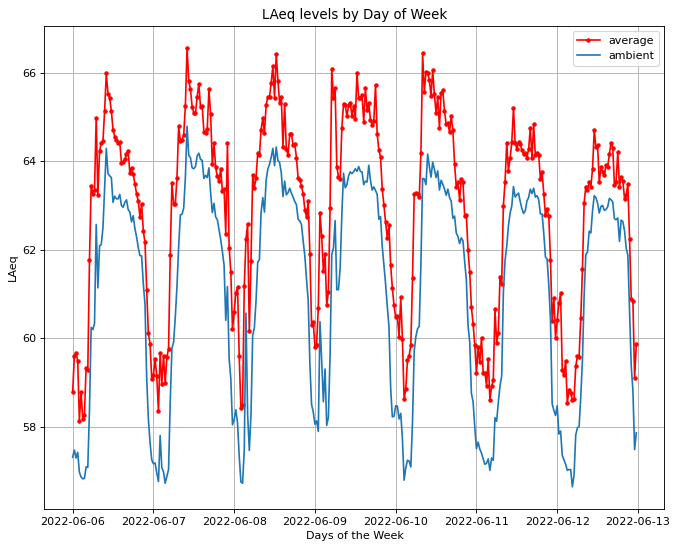

In [575]:
weekInfo = groupWeek(DateDW)
print(weekInfo)

for week in weekInfo:
    
#     print("\n" +"="*40)
#     print(week)
#     print("-"*40)
#     print(weekInfo[week].dayofweek)
    DWlabels = weekInfo[week].index
    DWambient = weekInfo[week].ambient
    DWmeans = weekInfo[week].laeq['mean']

    print(DWambient)

    
#     print(DWlabels)

    figure(figsize=(10, 8), dpi=80)
    plt.plot(DWlabels, DWmeans, '.-', c = 'r')
#     plt.plot(DWlabels, DWmins, '.-', c = 'm')
#     plt.plot(DWlabels, DWmaxs, '.-', c = 'b')
    plt.plot(DWlabels, DWambient)

    plt.xlabel('Days of the Week')
    plt.ylabel('LAeq')
    # plt.yticks(np.linspace(round(min(mins)-1), np.ceil(max(maxs)),10, dtype=int))
    # plt.xticks(rotation = 90)
    plt.title('LAeq levels by Day of Week')
#     plt.errorbar(DWlabels, DWmeans, yerr = DWstds, c = 'r')
    plt.legend(['average','ambient'])
    plt.grid(True)
    plt.show()


# for series in weekInfo[1]:
#     x = series.to_frame()
#     print(type(x))
#     print(x)
#     # plt.plot(weekInfo[1])

## -------------------------

In [ ]:
DWdays, DWmeans, DWmins, DWmaxs, DWstds, DWmedians, DWambient = getBasicStat('dayofweek')

In [ ]:
daysofweekDict = {DWdays[0]:'Monday', DWdays[1]: 'Tuesday', DWdays[2]: 'Wednesday', DWdays[3]: 'Thursday', 
                  DWdays[4]: 'Friday', DWdays[5]: 'Saturday', DWdays[6]: 'Sunday'}

DWlabels = list(daysofweekDict.values())

In [ ]:
figure(figsize=(10, 8), dpi=80)
plt.plot(DWlabels, DWmeans, '.-', c = 'r')
plt.plot(DWlabels, DWmins, '.-', c = 'm')
plt.plot(DWlabels, DWmaxs, '.-', c = 'b')
plt.plot(DWlabels, DWmedians)

plt.xlabel('Days of the Week')
plt.ylabel('LAeq')
# plt.yticks(np.linspace(round(min(mins)-1), np.ceil(max(maxs)),10, dtype=int))
# plt.xticks(rotation = 90)
plt.title('LAeq levels by Day of Week')
plt.errorbar(DWlabels, DWmeans, yerr = DWstds, c = 'r')
plt.legend(['Average','Min', 'Max', 'Median'])
plt.grid(True)
plt.show()

#### Heat Map: Average Hourly LAeq Levels per Day of Week

In [ ]:
import seaborn as sns

In [ ]:
df['hour'] = df['datetime'].dt.hour

In [ ]:
# result = df.groupby(['hour', 'dayofweek']).agg({'laeq': ['mean', 'min', 'max', 'std', 'median']})
laeq_mean = df.groupby(['hour', 'dayofweek']).agg({'laeq': ['mean']})
# print(laeq_mean)

df2 = laeq_mean.reset_index().pivot(columns='dayofweek',index='hour',values={'laeq': ['mean']})
# print(df2)

fig, ax = plt.subplots(figsize=(5, 7))
hm = sns.heatmap(df2, vmin = 55, vmax = 70, linewidths=.5,cmap='OrRd');
hm.invert_yaxis()
hm.set_xticks(np.arange(len(DWlabels)))
hm.set_xticklabels(DWlabels, rotation=45)

plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.title(' Time Series: Average Hourly LAeq Levels per Day of Week Heat Map')

In [ ]:
# DWxHRdays, DWxHRmeans, DWxHRmins, DWxHRmaxs, DWxHRstds, DWxHRmedians = getBasicStat(['hour', 'dayofweek'])

#### Heat Map: LAeq Levels by Time of Day per Day of Week

In [ ]:
# df.set_index('datetime',inplace=True) #JUST NEED TO RUN THIS ONE TIME
x = df.resample('6H').mean();
# print(x)
# print(x.index.hour)
x['hour'] = x.index.hour;
DF = x.groupby(['dayofweek', 'hour']).agg({'laeq': ['mean']})

In [ ]:
print(DF)

In [ ]:
hours_ref=x['hour']
hourlist1=hours_ref.unique().tolist()
hrlist = sorted(hourlist1)

timeofdayDict = {hrlist[0]: 'Early Morning (12am-6am)', 
                 hrlist[1]: 'Morning (6am-12pm)', 
                 hrlist[2]: 'Afternoon (12pm-6pm)', 
                 hrlist[3]: 'Night (6pm-12am)'}

TDlabels = list(timeofdayDict.values())
print(timeofdayDict)

In [ ]:
y = x.reset_index().pivot_table(index='hour', columns='dayofweek', values='laeq', aggfunc='mean')
print(y)

In [ ]:
y = x.reset_index().pivot_table(index='hour', columns='dayofweek', values='laeq', aggfunc='mean')

# df3 = x.reset_index().pivot(columns='dayofweek',index='hour',values={'laeq': ['mean']})

# print(df2)

fig, ax = plt.subplots(figsize=(5, 7))
hm = sns.heatmap(y, annot=True, vmin = 55, vmax = 70, linewidths=.5,cmap='Blues');
hm.invert_yaxis()
hm.set_yticks(np.arange(len(TDlabels)))
hm.set_yticklabels(TDlabels, rotation=0)
hm.set_xticks(np.arange(len(DWlabels)))
hm.set_xticklabels(DWlabels, rotation=90)

plt.title(' LAeq Levels by Time of Day per Day of Week Heat Map')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
